In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as plty
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [2]:
path="Customer Churn Data.xlsx"
names = ['AccountID', 'Churn','Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender', 'Service_Score', 'Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']
df = pd.read_excel(path, names = names,sheet_name='Data for DSBA')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [3]:
df.isna().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [4]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Handling missing Values and Abnormal Values

In [5]:
df.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [6]:
df['rev_per_month']=df['rev_per_month'].replace('+','')
df['rev_per_month']=pd.to_numeric(df['rev_per_month'])
df['rev_per_month']=df['rev_per_month'].replace('',df['rev_per_month'].mean())

In [7]:
df.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [8]:
df['Tenure']=df['Tenure'].replace('#','')
df['Tenure']=pd.to_numeric(df['Tenure'])
df['Tenure']=df['Tenure'].replace('',df['Tenure'].mean())

In [9]:
df.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [10]:
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].replace('$','')
df['Day_Since_CC_connect']=pd.to_numeric(df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].replace('',df['Day_Since_CC_connect'].mean())

In [11]:
df.Account_user_count.unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [12]:
df['Account_user_count']=df['Account_user_count'].replace('@','')
df['Account_user_count']=pd.to_numeric(df['Account_user_count'])
df['Account_user_count']=df['Account_user_count'].replace('',df['Account_user_count'].mean())

In [13]:
df.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [14]:
df['rev_growth_yoy']=df['rev_growth_yoy'].replace('$','')
df['rev_growth_yoy']=pd.to_numeric(df['rev_growth_yoy'])
df['rev_growth_yoy']=df['rev_growth_yoy'].replace('',df['rev_growth_yoy'].mean())

In [15]:
df.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [16]:
df['cashback']=df['cashback'].replace('$','')
df['cashback']=pd.to_numeric(df['cashback'])
df['cashback']=df['cashback'].replace('',df['cashback'].mean())

In [17]:
df.Login_device.unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [18]:
df['Login_device']=df['Login_device'].replace('&&&&','Tab')
df['Login_device']=df['Login_device'].replace('','Tab')

In [19]:
df.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [20]:
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('$','')
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('#','')
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('*','')
df['coupon_used_for_payment']=pd.to_numeric(df['coupon_used_for_payment'])
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('',df['coupon_used_for_payment'].mean())

In [21]:
df.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [22]:
df['account_segment']=df['account_segment'].replace('Regular +','Regular Plus')
df['account_segment']=df['account_segment'].replace('Super +','Super Plus')
df.account_segment.value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [23]:
df.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [24]:
df['Gender']=df['Gender'].replace('M','Male')
df['Gender']=df['Gender'].replace('F','Female')

In [50]:
na_cols = df.isna().any()
print(na_cols)

AccountID                  False
Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                     False
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status             False
rev_per_month               True
Complain_ly                 True
rev_growth_yoy              True
coupon_used_for_payment     True
Day_Since_CC_connect        True
cashback                    True
Login_device               False
dtype: bool


In [51]:
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in df.columns[1:]:
     if col in na_cols:
            if df[col].dtype != 'object':
                 df[col] =  df[col].fillna(df[col].mean()).round(0)


In [52]:
df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['account_segment'].fillna(df['account_segment'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)
df['Login_device'].fillna(df['Login_device'].mode()[0],inplace=True)


## Visualization

### Univariate

<AxesSubplot:xlabel='Churn', ylabel='count'>

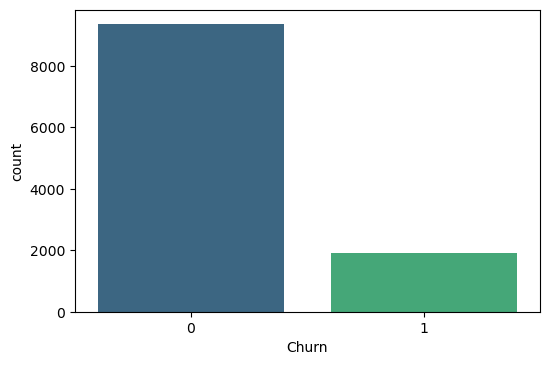

In [25]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=df,x='Churn',palette='viridis')

## Bivariate

C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

<AxesSubplot:xlabel='Payment', ylabel='count'>

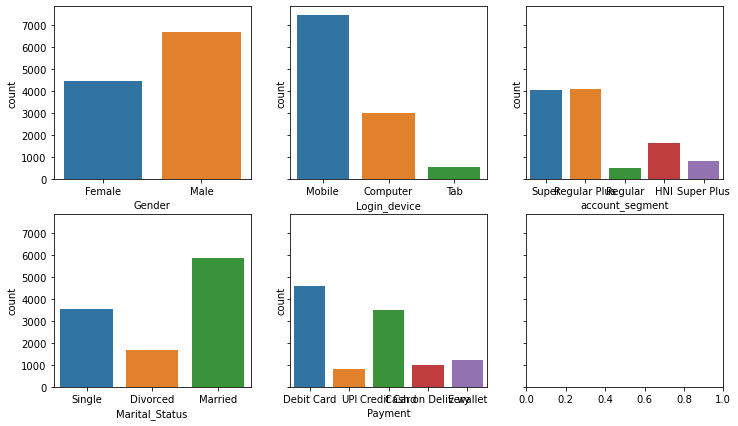

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("Gender", data=df, ax=axes[0,0])
sns.countplot("Login_device", data=df, ax=axes[0,1])
sns.countplot("account_segment", data=df, ax=axes[0,2])
sns.countplot("Marital_Status", data=df, ax=axes[1,0])
sns.countplot("Payment", data=df, ax=axes[1,1])
#sns.countplot("Login_device", data=df, ax=axes[1,2])


In [27]:
Payment_split = df[[ "AccountID", "Payment"]]
pmt = Payment_split .groupby ("Payment")
Payment_split= pd.DataFrame(pmt["AccountID"].count())
Payment_split.rename(columns={'AccountID':'No. of customers'}, inplace=True)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

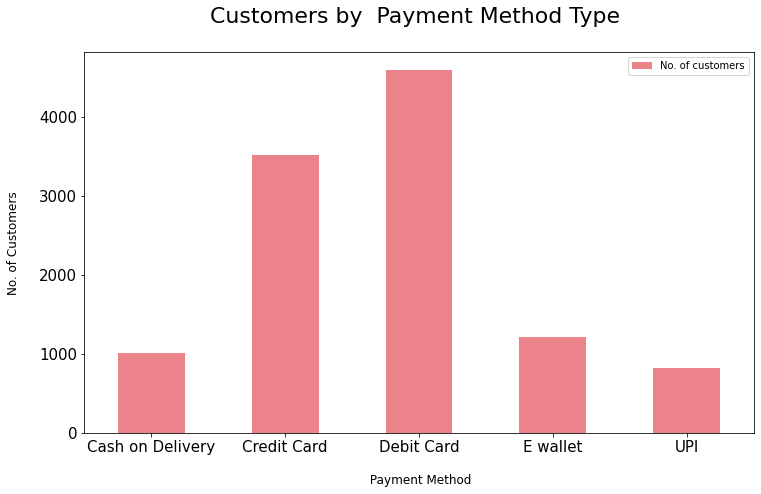

In [28]:
ax =  Payment_split[["No. of customers"]].plot.bar(title = 'Customers by Payment Method',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by  Payment Method Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

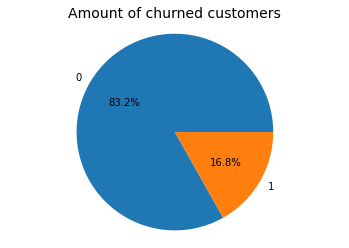

In [29]:
target = df["Churn"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

In [30]:
# Some functions

churned = df[df['Churn'] == 1]
nonchurned = df[df['Churn'] == 0]
def plot_pie(column):
    target = df[column].value_counts()    
    fig1, ax1 = plt.subplots()    
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title("All customers", fontsize=14)
    plt.show()
    

def plot_compare(column, category_name):
    NChurned = len(churned[column].unique())
    NNonChurned = len(nonchurned[column].unique())
    
    ChurnedCounts = churned[column].value_counts().sort_index()
    NonChurnedCounts = nonchurned[column].value_counts().sort_index()
    
    indchurned = np.arange(NChurned)    # the x locations for the groups
    indnonchurned = np.arange(NNonChurned)    
    width = 1       # the width of the bars: can also be len(x) sequence
    
    figs, axs = plt.subplots(1,2, figsize=(12,5))
    
    axs[1].bar(indchurned, ChurnedCounts, width, color='#DD8452')
    axs[1].set_title('Churned ' + category_name, fontsize=20)
    axs[1].set_xticks(indchurned)
    axs[1].set_xticklabels(ChurnedCounts.index.tolist(), rotation=45)
    
    axs[0].bar(indnonchurned, NonChurnedCounts, width, color='b')
    axs[0].set_title('Non Churned ' + category_name, fontsize=20)
    axs[0].set_ylabel('Amount of People')
    axs[0].set_xticks(indnonchurned)
    axs[0].set_xticklabels(NonChurnedCounts.index.tolist(), rotation=45)
    
    
    plt.show()

#### Tenure vs Churn

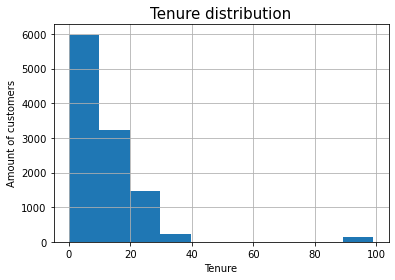

In [31]:
# Checking the overal distribution
df["Tenure"].hist()
plt.xlabel("Tenure")
plt.ylabel("Amount of customers")
plt.title("Tenure distribution", fontsize=15)
plt.show()

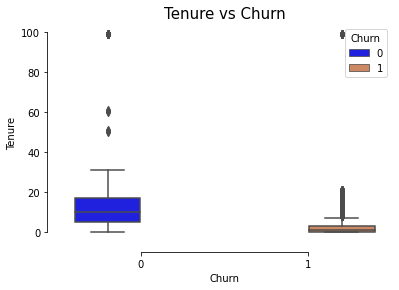

In [32]:
# Comparing the age distribution vs the target
sns.boxplot(x="Churn", y="Tenure",
            hue="Churn", palette=["b", "#DD8452"],
            data=df).set_title("Tenure vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

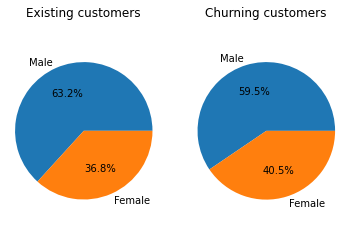

In [33]:
churnedtarget = churned["Gender"].value_counts()
nonchurnedtarget = nonchurned["Gender"].value_counts()

fig1, axs = plt.subplots(1, 2)

axs[0].pie(churnedtarget, labels=churnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Existing customers')

axs[1].pie(nonchurnedtarget, labels=nonchurnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[1].axis('equal')
axs[1].set_title('Churning customers')

plt.show()

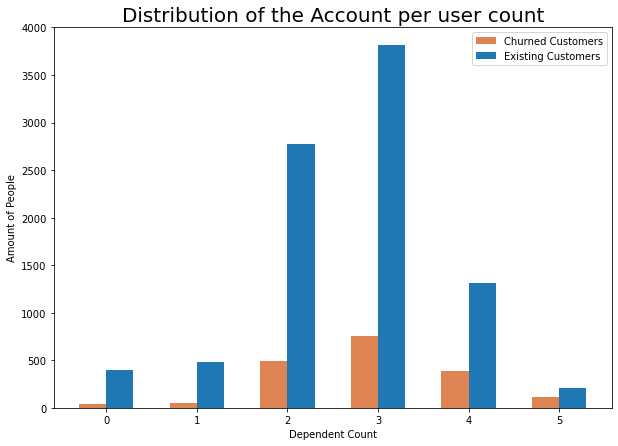

In [34]:
N = 6
ChurnedCounts = churned["Account_user_count"].value_counts().sort_index()
NonChurnedCounts = nonchurned["Account_user_count"].value_counts().sort_index()

ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

figs, axs = plt.subplots(figsize=(10,7))

axs.bar(ind - width/2, ChurnedCounts, width, color = "#DD8452")
axs.bar(ind + width/2, NonChurnedCounts, width)

axs.set_xlabel('Dependent Count')
axs.set_ylabel('Amount of People')
axs.set_title('Distribution of the Account per user count', fontsize=20)
# axs.set_xticks(ind, ('0', '1', '2', '3', '4', '5'))
axs.legend(('Churned Customers','Existing Customers',))

plt.show()

In [35]:
nonchurned['Account_user_count'].describe()

count    8986.000000
mean        3.643334
std         1.017372
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: Account_user_count, dtype: float64

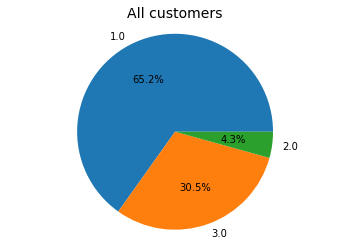

In [36]:
plot_pie("City_Tier")

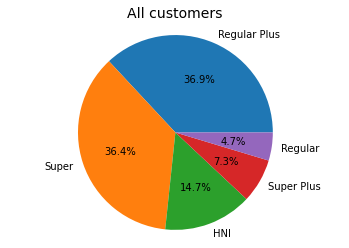

In [37]:
plot_pie("account_segment")

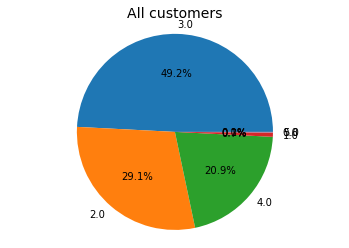

In [38]:
plot_pie("Service_Score")

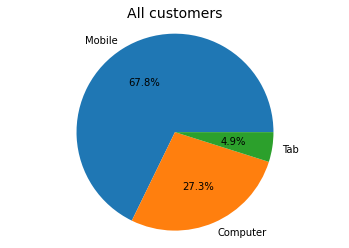

In [39]:
plot_pie("Login_device")

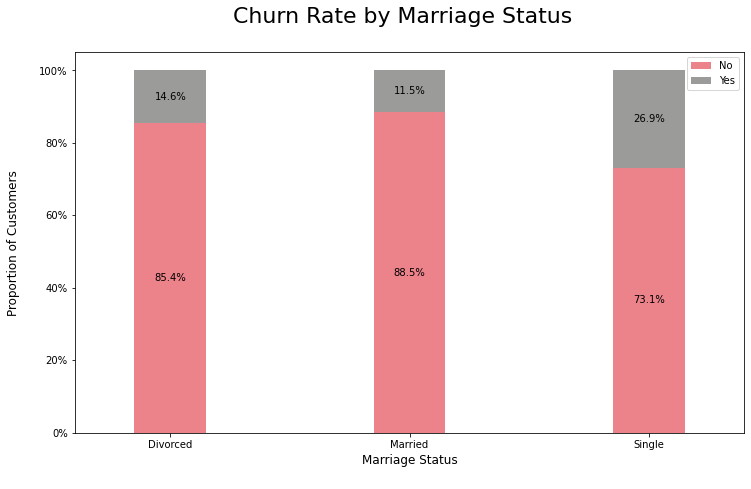

In [40]:

contract_churn =df.groupby(['Marital_Status','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Marriage Status\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Marriage Status  \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


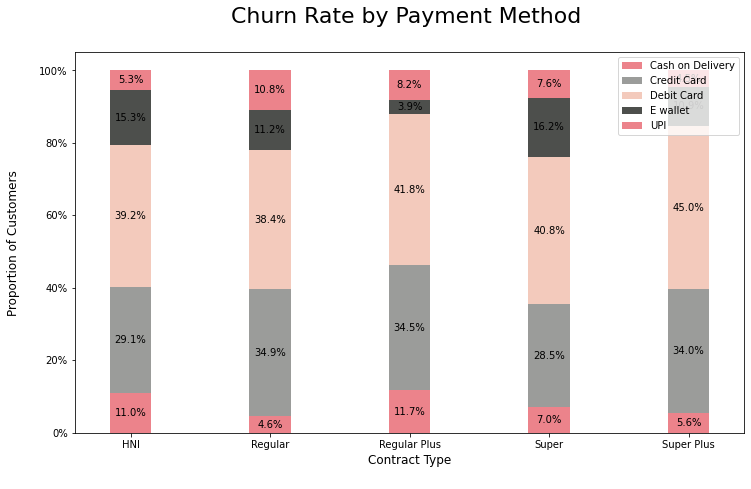

In [41]:

segment_churn = df.groupby(['account_segment','Payment']).size().unstack()
segment_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838b','#9b9c9a', '#f3cabc' , '#4d4f4c']
ax = (segment_churn.T*100.0 / segment_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


In [43]:
correlations = df.corr()['Churn'].sort_values(ascending = False)
for i in correlations:
    print(i)

1.0
0.2514876415439961
0.1072916665508655
0.10579635995235272
0.08413527232297784
0.07207149790644284
0.022537970474094733
0.008990913234995722
-0.009541386555324641
-0.013876599840940505
-0.014826074466512865
-0.03238221242108527
-0.14795639171925287
-0.23315026338762743


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

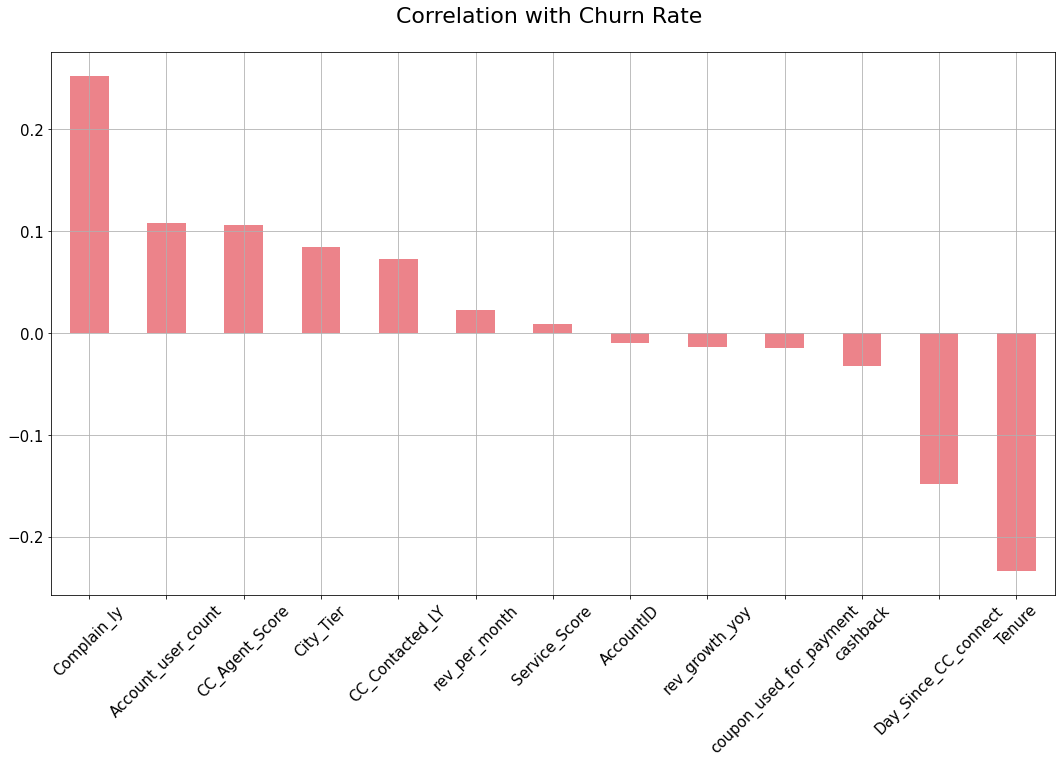

In [44]:
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

### Label Encoding

In [45]:
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
value=df.columns
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 5:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
            le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            print(le_name_mapping)
print('{} columns were label encoded.'.format(le_count))

{'Female': 0, 'Male': 1, nan: 2}
{'Divorced': 0, 'Married': 1, 'Single': 2, nan: 3}
{'Computer': 0, 'Mobile': 1, 'Tab': 2, nan: 3}
3 columns were label encoded.


In [54]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                       int32
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status               int32
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                 int32
dtype: object

In [55]:
dataset2 = df[['Payment','account_segment','Marital_Status','Login_device']]
dataset2.head()

,Payment,account_segment,Marital_Status,Login_device
0,Debit Card,Super,2,1
1,UPI,Regular Plus,2,1
2,Debit Card,Regular Plus,2,1
3,Debit Card,Super,2,1
4,Credit Card,Regular Plus,2,1


In [56]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
dataset2 = df[['Payment','account_segment','Marital_Status','Login_device']]
calc_vif(dataset2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''